## About this Notebook  
In this Notebook I tried to perform data visualization on the dataset us_accident_dataset. In order to describe this data more vividly I tried to use several different types of plots such as folium.Map, Histogram, Bar plot, Waffle plot, WordCloud.

# US Accidents Data Visualization and Analysis (over 7.7 million rows)

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Downloading and Prepping Data</a></li>
        <li><a href="#ref2">Distribution of the accidents accross US states (except Alaska)</a></li>
        <li><a href="#ref3">Impact of Visibility</a></li>
        <li><a href="#ref4">Monthly Distribution</a></li>
        <li><a href="#ref5">Hourly Distribution During the Week</a></li>
        <li><a href="#ref6">Distribution Along Weekdays</a></li>
        <li><a href="#ref7">Analysis on the Recorded Accident Descriptions</a></li>
        <li><a href="#ref8">Impact of the Temperature</a></li>
        <li><a href="#ref9">Quick Check the Impacts of other features</a></li>
        <li><a href="#ref10">Acknowledgements and References</a></li>
    </ol>
    
</div>

<hr>  

<h2>
<!--
<div class="alert alert-danger"" style="margin-top: 20px">
-->
          If the map could NOT be opened, Please view the notebook via Jupyter nbviewer by <br> <a href="https://nbviewer.jupyter.org/github/Abdurahman-Amat/Kaggle_Projects/blob/master/US_accidents_data_analysis_visualization.ipynb" target="_blank">clicking here </a>, thank you!!!
</div>
</h2>  

<a id="ref1"></a>
# Downloading and Prepping Data

In [16]:
# import libraries which are necessary in this notebook
import numpy as np
import pandas as pd
from os import path
import datetime
import matplotlib
# import folium library
from folium import plugins
import folium
# use Waffle from pywaffle library for waffle plot
!pip install pywaffle
from pywaffle import Waffle
# Start with loading all necessary libraries
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib import cm # color map

     |████████████████████████████████| 25.7MB 10.9MB/s eta 0:00:01


In [17]:
# Read the whole dataset into a Pandas' DataFrame
#df=pd.read_csv('../input/us-accidents/US_Accidents_June20.csv')
df=pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')


In [18]:
# quick overview of the data
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


SO, data is loaded successfully.  
Let us loot at the size of the dataset

In [19]:
# Number of total entries
df.shape

(7728394, 46)

More ca. 7.73 million entries, super!

### Prepare the dataset for further viualization and analysis
Lets check if there are any missing / NAN values in this dataset.

In [20]:
# Lets check the nan values with in each column / feature
# percentage of missing values in each column
print((100*df.isnull().sum()/df.shape[0]).round(2))

ID                        0.00
Source                    0.00
Severity                  0.00
Start_Time                0.00
End_Time                  0.00
Start_Lat                 0.00
Start_Lng                 0.00
End_Lat                  44.03
End_Lng                  44.03
Distance(mi)              0.00
Description               0.00
Street                    0.14
City                      0.00
County                    0.00
State                     0.00
Zipcode                   0.02
Country                   0.00
Timezone                  0.10
Airport_Code              0.29
Weather_Timestamp         1.56
Temperature(F)            2.12
Wind_Chill(F)            25.87
Humidity(%)               2.25
Pressure(in)              1.82
Visibility(mi)            2.29
Wind_Direction            2.27
Wind_Speed(mph)           7.39
Precipitation(in)        28.51
Weather_Condition         2.24
Amenity                   0.00
Bump                      0.00
Crossing                  0.00
Give_Way

Before doing any analysis we can exclude for the moment the features *'TMC', 'End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Wind_Speed(mph)', 'Precipitation(in)'* due to the significant amount of NAN / missing values **29.45%, 70.55%, 70.55%, 64.40%, 53.17%, 12.94%, 57.66%,** respectively. One can consider them later in the analysis if their impact on the occurence of accidents. 

In [21]:
# drop these columns
df_new = df.drop(['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Wind_Speed(mph)', 'Precipitation(in)'], axis = 1)
df_new.dropna(axis = 0, how = 'any', inplace = True)

In [22]:
# check the shape again
df_new.shape

(7426729, 41)

In [23]:
# check again the possible nan / missing values
df_new.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
S

<a id="ref2"></a>
# Distribution of the accidents across US states


In [24]:
df_new.groupby(['State'], as_index=False).count()

,State,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,AL,98278,98278,98278,98278,98278,98278,98278,98278,98278,...,98278,98278,98278,98278,98278,98278,98278,98278,98278,98278
1,AR,21069,21069,21069,21069,21069,21069,21069,21069,21069,...,21069,21069,21069,21069,21069,21069,21069,21069,21069,21069
2,AZ,162210,162210,162210,162210,162210,162210,162210,162210,162210,...,162210,162210,162210,162210,162210,162210,162210,162210,162210,162210
3,CA,1671194,1671194,1671194,1671194,1671194,1671194,1671194,1671194,1671194,...,1671194,1671194,1671194,1671194,1671194,1671194,1671194,1671194,1671194,1671194
4,CO,87917,87917,87917,87917,87917,87917,87917,87917,87917,...,87917,87917,87917,87917,87917,87917,87917,87917,87917,87917
5,CT,70029,70029,70029,70029,70029,70029,70029,70029,70029,...,70029,70029,70029,70029,70029,70029,70029,70029,70029,70029
6,DC,17434,17434,17434,17434,17434,17434,17434,17434,17434,...,17434,17434,17434,17434,17434,17434,17434,17434,17434,17434
7,DE,13837,13837,13837,13837,13837,13837,13837,13837,13837,...,13837,13837,13837,13837,13837,13837,13837,13837,13837,13837
8,FL,849818,849818,849818,849818,849818,849818,849818,849818,849818,...,849818,849818,849818,849818,849818,849818,849818,849818,849818,849818
9,GA,163927,163927,163927,163927,163927,163927,163927,163927,163927,...,163927,163927,163927,163927,163927,163927,163927,163927,163927,163927


In [25]:
# Number of accidents by each state
df_state=df_new.groupby(['State'], as_index=False).count().iloc[:,:2]
# Rename the column that make more sence
df_state=df_state.rename(columns={"ID":"NrAccidents"})
# sort by number of accidents
df_state.sort_values(by=['NrAccidents'], ascending=False, inplace=True)
df_state.head()

,State,NrAccidents
3,CA,1671194
8,FL,849818
41,TX,566645
38,SC,371114
32,NY,338861


In [26]:
# plot the map by using folium with corresponding distribution of accidents
# geojson file without AK, Alaska
us_states_geo = r'../input/geojson/us_states_49.json' 


# set the size of the plotting canvas / figsize
f = folium.Figure(width=900, height=500)
# create a plain USA map object
us_accident_distribution_map = folium.Map(location=[40, -100], zoom_start=4).add_to(f)

# threshold scaling
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_state['NrAccidents'].min(),
                              df_state['NrAccidents'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration
# Apply the corresponding dataset to the map
folium.Choropleth(
    geo_data=us_states_geo,
    name='choropleth',
    data=df_state,
    columns=['State','NrAccidents'],
    key_on='feature.id',
    threshold_scale=threshold_scale,
    fill_color='OrRd',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Overview of the number of accidents across US (Alaska is not included)',
    reset=True
).add_to(us_accident_distribution_map)
folium.LayerControl().add_to(us_accident_distribution_map)
us_accident_distribution_map

In [27]:
# set the state names as the index
df_state.set_index('State', inplace=True)

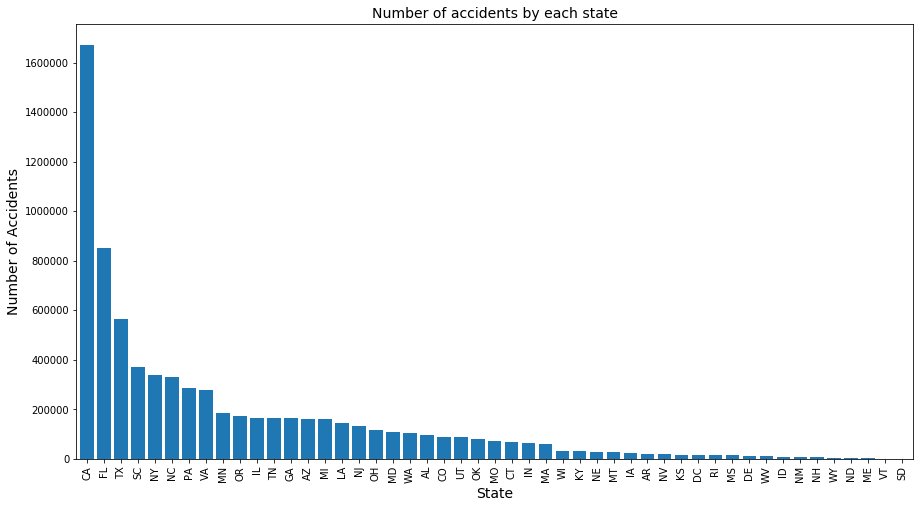

In [28]:

# plot data in bar chart
df_state.plot(kind='bar', width=0.8, figsize=(15, 8), legend=False)
plt.xlabel('State', fontsize=14) # add to x-label to the plot
plt.ylabel('Number of Accidents', fontsize=14) # add y-label to the plot
plt.title('Number of accidents by each state', fontsize=14) # add title to the plot
plt.show()

We can see that more than half of the accidents were actually occured in the first eight states namely 'CA, FL,TX, SC, NY, NC, PA, VA'. We might see this significance more clearly with Waffle plot.

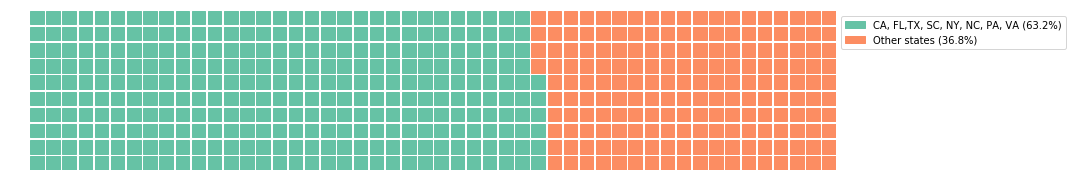

In [30]:
# lets look at the first six states with highest number of accidents
state6 = df_state['NrAccidents'].iloc[:8].sum(axis=0)
state_rest = df_new.shape[0] - df_state['NrAccidents'].iloc[:8].sum(axis=0)
# plot as waffle
data = {'CA, FL,TX, SC, NY, NC, PA, VA': (100*state6/df_new.shape[0]).round(1), 'Other states': (100*state_rest/df_new.shape[0]).round(1)}
fig = plt.figure(
    figsize=(15, 20),
    FigureClass=Waffle, 
    rows=10, 
    columns=50,
    values=data, 
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
    )
plt.show()

<a id="ref3"></a>
# Impact of Visibility

Let us check if the visibility has any noticeable impact on the occurance of accidents.

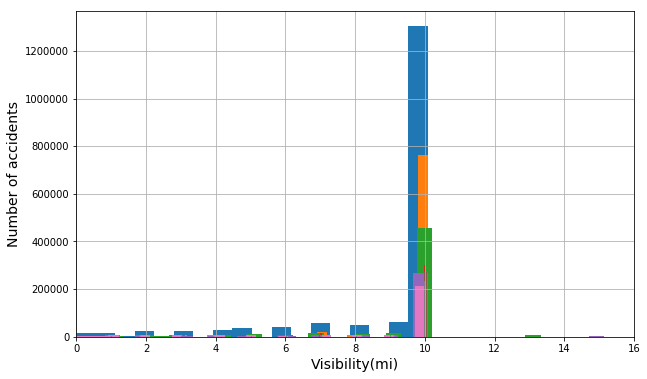

In [31]:
bins=250
plt.figure(figsize=(10, 6))


for st in ['CA', 'FL','TX', 'SC', 'NY', 'NC', 'PA', 'VA']:    
    # set s filter
    stfilt = (df_new['State'] == st)
    plt.hist(df_new.loc[stfilt,'Visibility(mi)'], bins, density=False)
plt.xlabel('Visibility(mi)', fontsize=14)
plt.ylabel('Number of accidents', fontsize=14)
plt.xlim(0,16)
plt.grid()
plt.show()

We can see that the impact of the visibility on the number of accidents is not significant. For instance, in state 'CA', California, occured the largest number of accidents among other states. Anyway, most of the recorded accidents occured when the visibility was aroud around 10 mi.

<a id="ref4"></a>
# Monthly Distribution

Let us perform some timely analysis

In [32]:
def which_day(date_time):
    '''
    To find out which weekday according to given timestamp with the format 'yyyy-mm-dd hh:mm:ss'
        input: datetime string with the format of 'yyyy-mm-dd hh:mm:ss'
        return: nth day of the week
    '''
    # import time and date modules
    from datetime import datetime
    # import calendae modules to extract the exact weekday
    import calendar
    try:
        if type(date_time) is str:
            my_string=date_time.split(' ')[0]
            my_date = datetime.strptime(my_string, "%Y-%m-%d")
            return my_date.weekday()
        else:
            raise Exception("'date_time' has unexpected data type, it is expected to be a sting")

    except Exception as e:
        print(e)
# use above function to find which weekday 
nth_day=[]
date_time=[dt for dt in df_new['Start_Time']]
for i in range(len(date_time)):
    nth_day.append(which_day(date_time[i]))
# add four new columns 'year', 'month', 'hour', 'weekday'
df_new['year'] = pd.DatetimeIndex(df_new['Start_Time']).year
df_new['month'] = pd.DatetimeIndex(df_new['Start_Time']).month
df_new['hour'] = pd.DatetimeIndex(df_new['Start_Time']).hour
df_new['weekday']=nth_day

lets check the shape of the new dataset

In [33]:
df_new.shape

(7426729, 45)

In [34]:
df_new.loc[:,['year', 'month', 'hour', 'weekday', 'Start_Time']].head()

,year,month,hour,weekday,Start_Time
0,2016,2,5,0,2016-02-08 05:46:00
1,2016,2,6,0,2016-02-08 06:07:59
2,2016,2,6,0,2016-02-08 06:49:27
3,2016,2,7,0,2016-02-08 07:23:34
4,2016,2,7,0,2016-02-08 07:39:07


In [35]:
df_month=df_new[df_new['year'].isin(['2016','2017', '2018', '2019', '2020', '2021', '2022', '2023'])].groupby(['month'], as_index=False).count().iloc[:,:2]
# by changing the argument in 'isin()' one can look at quite directly the change of the accidents during the years,
# which I did not do it here.
df_month.head()

,month,ID
0,1,720266
1,2,634049
2,3,535202
3,4,567738
4,5,538951


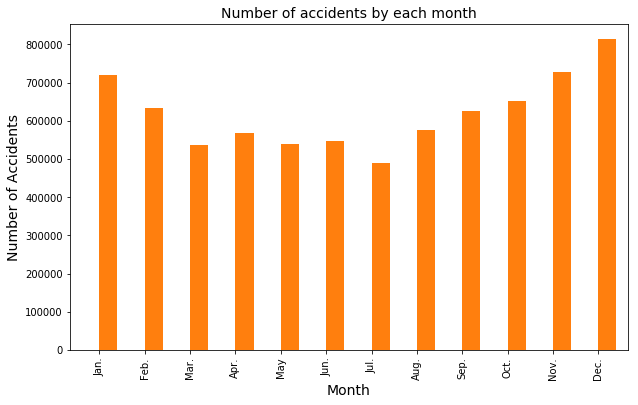

In [36]:
# plot data in bar chart
ax=df_month.plot(kind='bar', width=0.8, figsize=(10, 6), legend=None)
xtick_labels=['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']
ax.set_xticks(list(df_month.index))
ax.set_xticklabels(xtick_labels)
ax.set_xlabel('Month', fontsize=14) # add to x-label to the plot
ax.set_ylabel('Number of Accidents', fontsize=14) # add y-label to the plot
ax.set_title('Number of accidents by each month', fontsize=14) # add title to the plot
plt.show()

In [37]:
wday_filt = (df_new['weekday'].isin([0, 1, 2, 3, 4]))#.to_frame()
weekend_filt = (df_new['weekday'].isin([5, 6]))#.to_frame()
df_wday = (df_new.loc[wday_filt])[['hour']]#.count().iloc[:, :2]
df_weekend = (df_new.loc[weekend_filt])[['hour']]#.count().iloc[:, :2]

<a id="ref5"></a>
# Hourly Distribution

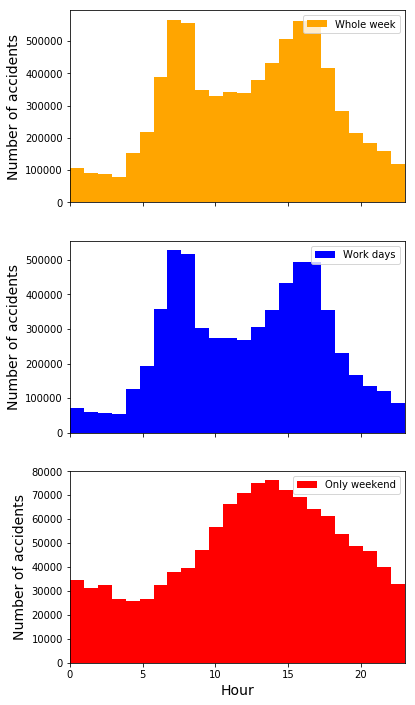

In [38]:
# plot the distribution of accidents during the day
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 12), sharex=True)
ax0, ax1, ax2 = axes.flatten()
bins=24
kwargs = dict(bins=24, density=False, histtype='stepfilled', linewidth=3)
# ax0
ax0.hist(list(df_new['hour']),  **kwargs, color='orange', label='Whole week')
ax0.set_ylabel('Number of accidents', fontsize=14)
# ax1
ax1.hist(list(df_wday['hour']), **kwargs, color='blue', label='Work days')
ax1.set_ylabel('Number of accidents', fontsize=14)
# ax2
ax2.hist(list(df_weekend['hour']),  **kwargs, color='Red', label='Only weekend')
ax2.set_ylabel('Number of accidents', fontsize=14)
ax2.set_xlabel('Hour', fontsize=14)
ax0.legend(); ax1.legend(); ax2.legend()
plt.xlim(0, 23)
#plt.ylim(0, 2.5e5)
plt.show()


Most of the accidents were during the day time, especially **around rush hours both inthe mornings and afternoons of wor days**. At weekends there are relatively less accidents and most of these accidents are occured from **7:00 AM to 9:00 PM**.

<a id="ref6"></a>
# Distribution Along Weekdays

In [39]:
df_weekday=df_new.groupby(['weekday'], as_index=False).count().iloc[:,:2]
# set the month as the index
df_weekday.set_index('weekday', inplace=True)

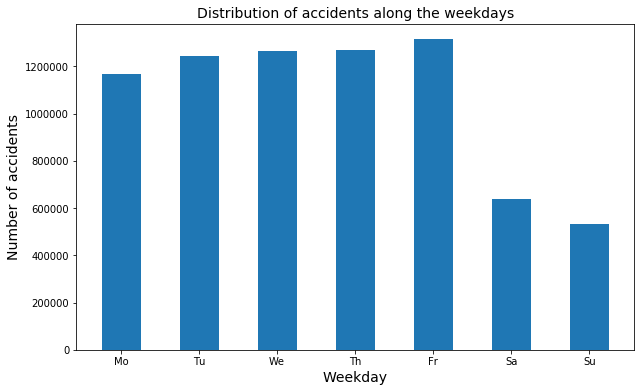

In [40]:
# plot data in bar chart
labels = ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(10, 6))
ax1 = ax.bar(x, df_weekday['ID'], width=0.5)
#ax1 = ax.plot(x, df_weekday['ID'],marker='o', lw=2)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of accidents', fontsize=14)
ax.set_xlabel('Weekday', fontsize=14)
ax.set_title('Distribution of accidents along the weekdays', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)

#df_weekday.plot(kind='line', figsize=(10, 6), legend=None)

#plt.xlabel('Weekday', fontsize=14) # add to x-label to the plot
#plt.ylabel('Number of Accidents', fontsize=14) # add y-label to the plot
#plt.title('Number of accidents by each state', fontsize=14) # add title to the plot
plt.show()

From the above plot we can clearly see that there are relatively less accidents on weekends.

<a id="ref7"></a>
# Analysis on the Recorded Accident Descriptions 

In [41]:
!pip install Pillow
!pip install wordcloud

In [42]:
# join all descriptions from all accidents
dsc=df_new['Description'].astype(str)
# remove non-words
#sanitized_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split()) 
text = " ".join(desc for desc in dsc)
print ("There are {} words in the combination of all description.".format(len(text)))

There are 518159817 words in the combination of all description.


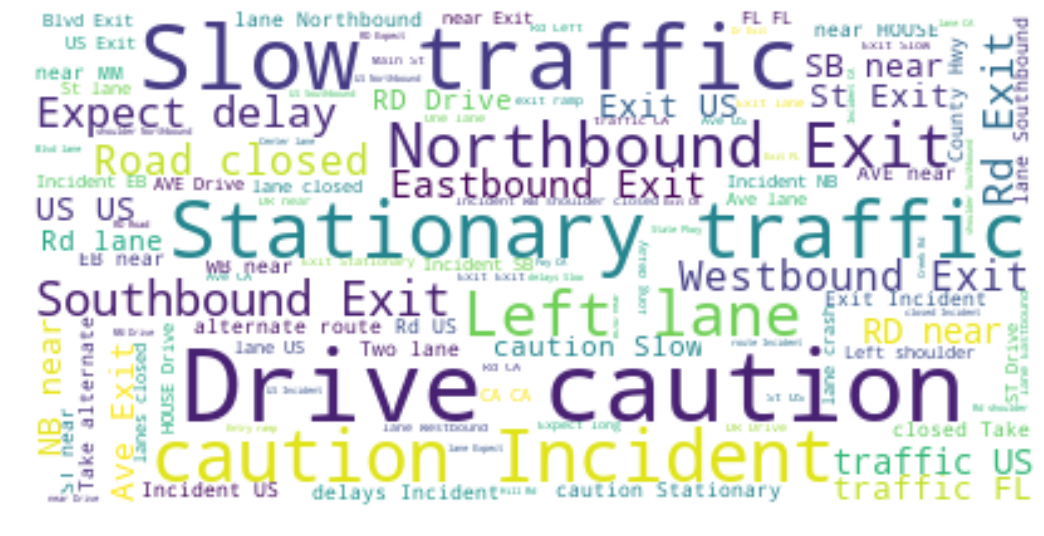

In [43]:
more_stopwords=["accident", "due", "blocked", "Right", "hand"]
for more in more_stopwords:
    STOPWORDS.add(more)
# Generate a word cloud image
# lower max_font_size
wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=40, background_color="white").generate(text)
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show
# Save the image in the img folder:
wordcloud.to_file("us_accidents_description.png")

From this WordCloud one can see clearly that there are more accidents around highways (the size of the words directly proportional to their frequencies of appearence in the recorded description of the accidents.) and around the roads of smaller neighborhoods of USA. 

<a id="ref8"></a>
# Impact of the Temperature

In [44]:
df_T=df_new['Temperature(F)'].values

In [54]:

def F2C(F):
    """
    input: F    ist the Temperature in Fahrenheit
    output: C   ist the Temperature in Celsius
    """
    C = (F - 32) * 5/9
    return C
    

def C2F(C):
    """
    input: C   ist the Temperature in Celsius
    output: F    ist the Temperature in Fahrenheit
    """
    F = C*9/5 + 32
    return F

#check it
print(C2F(0))
print(F2C(32))

32.0
0.0


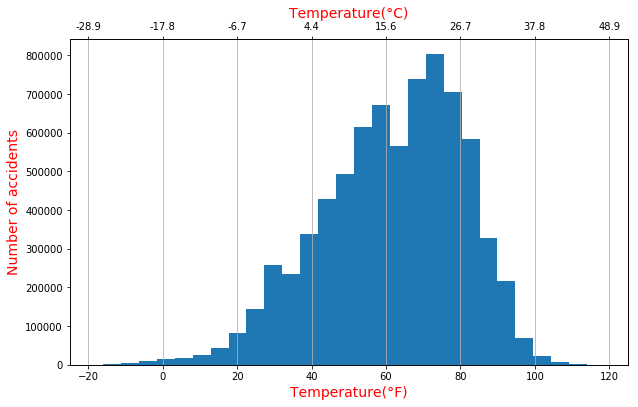

In [57]:
'''
# lambda function 
ftoc=lambda f:5/9*(f-32)
# function call
c=[]
for fi in f:
    c.append(round(ftoc(ni), 1))
c=np.array(c)
c
'''
num_bins = 50

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

# the histogram of the data
n, bins, patches = ax1.hist(df_T, num_bins, density=0) # set density=1 to normalize
# find bincenters
# bincenters = 0.5*(bins[1:]+bins[:-1])


ax1.set_xlabel(r"Temperature(°F)", fontsize=14, color='red')
ax1.set_ylabel('Number of accidents', fontsize=14, color='red')
ax1.set_xlim(-25, 125) # set xlim 
# Set the temperature in celisius
ax2 = ax1.twiny()
ax2.set_xlabel(r"Temperature(°C)", fontsize=14, color='red')
ax2.set_xlim(ax1.get_xlim())
ax2_Xticks_list = [-20, 0, 20, 40, 60, 80, 100, 120]
ax2.set_xticks(ax2_Xticks_list)
ax2.set_xticklabels([round(F2C(ticklabel), 1) for ticklabel in ax2_Xticks_list])
plt.grid()
plt.show()

This histogram tells us that most of the accidents were happened when the weather were neither too hot nor too cold to go out.

<a id="ref9"></a>
# Quick Check the Impacts of other features 

In [58]:
100*df.Severity.value_counts()/df.shape[0]

2    79.667017
3    16.812510
4     2.648804
1     0.871669
Name: Severity, dtype: float64

Accidents with severity level 1, indicates the least impact on traffic (i.e., short delay as a result of the accident), occured barely; with severity level 4,  indicates a significant impact on traffic (i.e., long delay), occured little number of times; with severity level 2 and 3, indicate the impact on traffic is around in midlevel, were occured quite frequently.

In [59]:
df.Stop.value_counts()

False    7514023
True      214371
Name: Stop, dtype: int64

'Stop' feature does have little impact.

In [60]:
df['Sunrise_Sunset'].value_counts()

Day      5334553
Night    2370595
Name: Sunrise_Sunset, dtype: int64

'Sunrise_Sunset' does have considerable impact that around **26.2%** of whole accidents occured during the night.

In [61]:
df['Traffic_Signal'].value_counts()

False    6584622
True     1143772
Name: Traffic_Signal, dtype: int64

The 'Traffic_Signal' has also some impact like such that around **16.9%** of whole accidents occured nearby traffic signal locations.

In [62]:
df['Give_Way'].value_counts()

False    7691812
True       36582
Name: Give_Way, dtype: int64

This 'Give_Way', indicates traffic signs / rules, hardly have impact on traffic accidents.

<a id="ref10"></a>
# Acknowledgements and References 

I would like to thank the provider of this dataset! This is my very first Kaggle project, even though there are no any prediction and machine learning type work. I am thinking a way to use classification based on some features who have noticeable impact on the the accidents. 

During the process of making myself familiar with this dataset I have found two published papers specifically on this dataset. If some one wants more information, please look at the following papers.

References:  
[1]. <a href="https://arxiv.org/abs/1906.05409">arXiv:1906.05409</a>  
[2]. <a href="https://arxiv.org/abs/1909.09638">arXiv:1909.09638</a>


--------------THE END------------